Define a basic ANN structure in TensorFlow using Keras APIs

In [1]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [2]:
from tensorflow.keras.layers import Dense

model.add(Dense(512, activation = 'relu', input_shape = (784,)))   
model.add(Dense(256, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 534,019
Trainable params: 534,019
Non-trainable params: 0
_________________________________________________________________


Classification of hand written digits using Neural Network


Load MNIST database

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Check the shape of input and output variables

In [5]:
print("shape of training data ",X_train.shape)
print("shape of training labels ",y_train.shape)
print("shape of training data ",X_test.shape)
print("shape of training labels ",y_test.shape)
print("type of X_train ",type(X_train))
print("type of y_train",type(y_train))

shape of training data  (60000, 28, 28)
shape of training labels  (60000,)
shape of training data  (10000, 28, 28)
shape of training labels  (10000,)
type of X_train  <class 'numpy.ndarray'>
type of y_train <class 'numpy.ndarray'>


Plot sample images

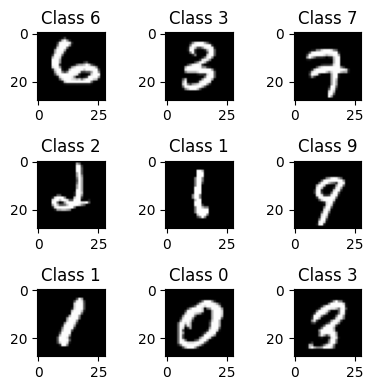

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
plt.rcParams['figure.figsize'] = (4,4)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

Pre-processing of the data

In [7]:
#reshape the input
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784) 

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize the input
X_test /= 255

Converting the class labels into one hot vector

In [8]:
from tensorflow.keras.utils import to_categorical
num_class = 10
print("label of 100th instance in training data: ", y_train[100])
print("label of 500th instance in test data: ", y_test[500])

y_train = to_categorical(y_train, num_class)
y_test = to_categorical(y_test, num_class)

print("label of 100th instance in training data one hot encoded: ",y_train[100])
print("label of 500th instance in test data one hot encoded: ",y_test[500])

label of 100th instance in training data:  5
label of 500th instance in test data:  3
label of 100th instance in training data one hot encoded:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
label of 500th instance in test data one hot encoded:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Define a simple feedforward neural network

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (784,)))   
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_class, activation = 'softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


Train the network

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train,
          batch_size=128, epochs=10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.2412 - accuracy: 0.9300
Epoch 2/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0886 - accuracy: 0.9725
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0562 - accuracy: 0.9826
Epoch 4/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0383 - accuracy: 0.9881
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0281 - accuracy: 0.9910
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0230 - accuracy: 0.9928
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0174 - accuracy: 0.9945
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0166 - accuracy: 0.9945
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 0.0138 - accuracy: 0.9958
Epoch 10/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0131 - accura

Evaluate on test set

In [13]:
score = model.evaluate(X_test, y_test)
print('loss on test data: ', score[0])
print('accuracy on test data:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0747 - accuracy: 0.9819
loss on test data:  0.07467583566904068
accuracy on test data: 0.9818999767303467


Implement a CNN on MNIST


load th dataset

In [14]:
#load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize the input
X_test /= 255

X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_test.shape[2], 1)

y_train = to_categorical(y_train, num_class)
y_test = to_categorical(y_test, num_class)

Define the CNN 

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

model = Sequential()      
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_class, activation="softmax"))

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

Train the CNN

In [18]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 49s 101ms/step - loss: 0.3313 - accuracy: 0.8993
Epoch 2/10
469/469 [==============================] - 48s 103ms/step - loss: 0.1040 - accuracy: 0.9678
Epoch 3/10
469/469 [==============================] - 49s 104ms/step - loss: 0.0781 - accuracy: 0.9762
Epoch 4/10
469/469 [==============================] - 56s 120ms/step - loss: 0.0653 - accuracy: 0.9800
Epoch 5/10
469/469 [==============================] - 48s 103ms/step - loss: 0.0576 - accuracy: 0.9825
Epoch 6/10
469/469 [==============================] - 47s 101ms/step - loss: 0.0512 - accuracy: 0.9838
Epoch 7/10
469/469 [==============================] - 48s 103ms/step - loss: 0.0480 - accuracy: 0.9850
Epoch 8/10
469/469 [==============================] - 49s 104ms/step - loss: 0.0457 - accuracy: 0.9858
Epoch 9/10
469/469 [==============================] - 48s 102ms/step - loss: 0.0413 - accuracy: 0.9874
Epoch 10/10
469/469 [==============================] - 47s 100ms/step - l

Plot the training performance

Text(0, 0.5, 'accuracy')

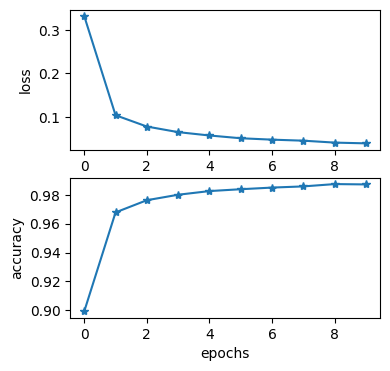

In [20]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.plot(history.history['loss'], '*-')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'],'*-')
plt.xlabel('epochs')
plt.ylabel('accuracy')

Evaluate on test set

In [21]:
score = model.evaluate(X_test, y_test)
print('loss on test data: ', score[0])
print('accuracy on test data:', score[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.0272 - accuracy: 0.9911
loss on test data:  0.02723855897784233
accuracy on test data: 0.991100013256073
